## LAB_7 - Performance Metrics for Classification 
### Name: Ramya Chandran
### StudenID: 8895789

# Performance Metrics for Classification 
Note: This notebook is adapted from [Geron's chapter 3 notebook](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb) in accordance with the [Apache v2 License](https://github.com/ageron/handson-ml3/blob/main/LICENSE).

This notebook is intended for _active learning_. As a student, please run the cells as we go over them in class, and answer the questions (marked with "_to the student_") in a new cell just below each question. Also, you are invited to take notes. Once you're done, you can commit and push this updated notebook to your repository, such that you could have a copy that includes all of your changes.

### Classification

To define classification let's look at the relevant [Wikipedia article](([Wikipedia](https://en.wikipedia.org/wiki/Statistical_classification))):

>In statistics and machine learning, classification is the problem of identifying which of a set of categories (sub-populations) an observation (or observations) belongs to. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.).

>Often, the individual observations are analyzed into a set of quantifiable properties, known variously as explanatory variables or features. These properties may variously be categorical (e.g. "A", "B", "AB" or "O", for blood type), ordinal (e.g. "large", "medium" or "small"), integer-valued (e.g. the number of occurrences of a particular word in an email) or real-valued (e.g. a measurement of blood pressure). Other classifiers work by comparing observations to previous observations by means of a similarity or distance function.

>An algorithm that implements classification, especially in a concrete implementation, is known as a classifier. The term "classifier" sometimes also refers to the mathematical function, implemented by a classification algorithm, that maps input data to a category.

A list of classification algorithms can be seen on a second [Wikipedia](https://en.wikipedia.org/wiki/Category:Classification_algorithms) article.

**To the student**: summarize in your own words, based on the Wikipeida content quoted above, and potentially additional sources:
* What are we trying to solve in a classification problem?

        In a classification problem, we seek to develop a predictive model that can accurately assign categorical labels to input data, allowing us to classify or categorize new instances based on their features and patterns in order to make informed decisions or predictions.

* What is a classifier?

        A classifier is an algorithm or model that is trained to assign predefined categories or labels to input data based on their features or characteristics, enabling the classification of new, unseen instances.

In this notebook, we will explore the evaluation of classifiers, rather than understanding how classifier are trained and make predictions. Evaluation of classifiers can be done by quantitative measures, often called _performance metrics_. We will look at the most common ones in this notebook. 

First let's load all of the libraries that will be used as part of this notebook:

In [27]:
# plotting modules
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

# cross validation functions
from sklearn.model_selection import cross_validate, cross_val_predict

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve


## Obtaining the Data
We load the data from `openml.org`. [openml.org](https://openml.org/) is a public repository for machine learning data and experiments, that allows everybody to upload open datasets.The `sklearn.datasets` package is able to download datasets from the repository using the function `sklearn.datasets.fetch_openml` ([sklearn User Guide](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#openml), [sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)).

**To the student**: 
* Browse to the openml website, and breifly describe what it contains based on its main landing page.
        
        OpenML.org is a public repository for machine learning data and experiments. Its main landing page typically features information about the platform, its mission, and the services it provides. Users can access a wide range of open datasets uploaded by the community, along with associated machine learning tasks and experiments. The website promotes collaboration, sharing, and reproducibility in the field of machine learning by allowing users to contribute datasets, track experiments, and access state-of-the-art machine learning models and techniques.

* Read the first two paragraphs in the [Wikipeida article](https://en.wikipedia.org/wiki/MNIST_database) describing MNIST. 
  * How many images does it have? 

         The MNIST database contains 60,000 training images and 10,000 testing images.

  * What is the size of each image? 

        Each image in the MNIST dataset has a size of 28x28 pixels.

  * Based on the image with _Sample images from MNIST test dataset_, how many unique digits does this dataset include?

         The MNIST dataset includes images of handwritten digits ranging from 0 to 9, representing ten unique digits.

* To get familiar with sklearn documentaion - browse the sklearn-doc to find out what `as_frame` stands for.

        The as_frame parameter in scikit-learn's fetch_openml function allows you to control whether the returned dataset is returned as a pandas DataFrame or as a regular NumPy array.

        When as_frame is set to False (the default value), the returned dataset will be in the form of a regular NumPy array. Each sample will be represented as a one-dimensional array, and the target variable will be a one-dimensional array as well.

        On the other hand, when as_frame is set to True, the returned dataset will be a pandas DataFrame. Each sample will be represented as a row in the DataFrame, where each feature will be a separate column. This can be useful if you prefer to work with pandas DataFrames for data analysis and manipulation.

In [28]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

**To the student**: can you guess what _784_ stands for?

        The number "784" in fetch_openml('mnist_784') refers to the total number of features or dimensions in each sample of the MNIST dataset. In the case of the MNIST dataset, each sample represents an image of a handwritten digit, and the images are originally formatted as 28x28 pixels. However, in order to use these images as input features for machine learning algorithms, they are typically flattened into a one-dimensional array of length 784 (i.e., 28x28 = 784). Each pixel in the original image corresponds to one feature or dimension in the flattened array.

## Exploring the Data

The object that is returned back from `fetch_openml` is a `Bunch` object ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)). This is a standard `sklearn` object, used for storing datasets.

In [29]:
type(mnist)

sklearn.utils._bunch.Bunch

It is a dictionary-like object, with keys and values just like a standard Python dictionary in that sense. So we can print out all of its keys:

In [30]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

By the way, the same can be achieved by:

In [31]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

The object also contains a description of the dataset that it contains. This is provided by the curators of the dataset. It can be accessed using the `DESCR` method of the object.

In [32]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Let's look into the `data` and the `target` attributes.

In [33]:
mnist.data.shape

(70000, 784)

In [34]:
mnist.data[0,200:205]

array([  0,   0,   0,  49, 238])

In [35]:
mnist.target.shape

(70000,)

In [36]:
print(mnist.target[0], mnist.target[1], mnist.target[2])

5 0 4


**To the student**: based on the examples above, as well as the info in `DESCR` and Wikipedia, can you describe:
* What `70000`, `748` stand for? 

        * The 70000 represents the total number of samples or images in the MNIST dataset. It consists of 70,000 handwritten digits collected from various sources.
        * The 748 stands for the number of flattened features or dimensions in each sample of the MNIST dataset. As mentioned earlier, each original image of size 28x28 pixels is flattened into a one-dimensional array of length 784 (28x28 = 784).

    
* What do the elements of the `mnist.data` array represent (e.g. `0`, `49`)?

        In the context of the mnist.data array, the elements represent the pixel intensity values of the corresponding image in the MNIST dataset. Each element in the array corresponds to the grayscale intensity value of a specific pixel in the image.

        For example, in the array array([0, 0, 0, 49, 238], dtype=int64), the values 0, 0, 0, 49, and 238 represent the intensity values of five consecutive pixels in the image. These intensity values indicate the level of darkness or lightness of each pixel. In the case of the MNIST dataset, the pixel intensities are represented as integer values ranging from 0 to 255, where 0 represents black and 255 represents white.

        Therefore, the elements 0, 0, 0, 49, and 238 in the mnist.data[0,200:205] array specifically represent the intensity values of the 201st to 205th pixels of the first image in the MNIST dataset.


* What do the values in `mnist.target` represent?

        The values in the mnist.target array represent the corresponding labels or classes of each image in the MNIST dataset. Each value indicates the digit that the handwritten image represents. For instance, if mnist.target[0] is 5, it means that the label of the first image in the dataset is the digit 5. The target array has the same length as the number of samples, in this case, 70,000.



Let's rename these objects to our familiar conventions, that are common regardless of the specific dataset being studied:

In [37]:
X = mnist.data
y = mnist.target

It will be good at this point to look at actual data instance, which is a single image:

In [38]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

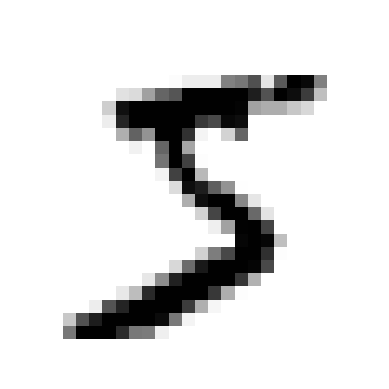

In [39]:
some_digit = X[0]  # here we are using the first image in the dataset
plot_digit(some_digit)
plt.show()

In [40]:
y[0]  # the label for the first image

'5'

For better famliarity with the dataset, let's plot the first 100 images.

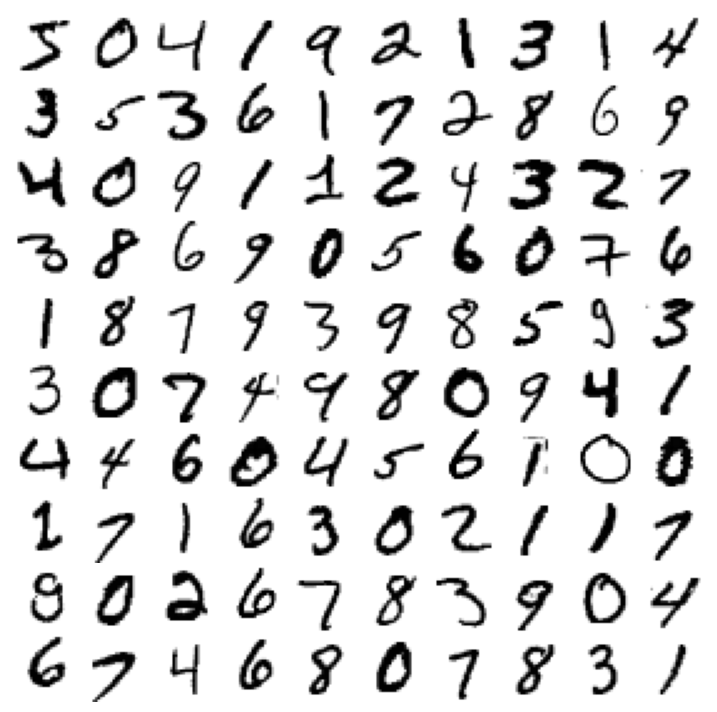

In [41]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

This provides an initial familiarity with the dataset.

An important property of a classification dataset is its skewness ([Wikipedia](https://en.wikipedia.org/wiki/Skewness)). For classification problems, the skewness is how uniform the data is in terms of the number of samples per label. In our case, it is the number of images for each digit. A uniform distribution, where each class has the same number of images, is a dataset with 0 skewness. 

**To the student**: In a new cell below, write a script that prints out the number of samples per label. Add a second Markdown cell, describing the skewness of the MNIST dataset in a sentence or two.

In [42]:
# Calculate the number of samples per label
samples_per_label = []
for label in set(mnist.target):
    count = len(mnist.data[mnist.target == label])
    samples_per_label.append((label, count))

# Print the number of samples per label
for label, count in samples_per_label:
    print(f"Label {label}: {count} samples")

Label 4: 6824 samples
Label 3: 7141 samples
Label 0: 6903 samples
Label 6: 6876 samples
Label 5: 6313 samples
Label 2: 6990 samples
Label 8: 6825 samples
Label 9: 6958 samples
Label 1: 7877 samples
Label 7: 7293 samples


            The MNIST dataset exhibits a low skewness, indicating a relatively balanced distribution of samples per label. Each digit class from 0 to 9 has a reasonably similar number of images, leading to a more uniform distribution. This balance in the number of samples per label helps ensure fair and reliable classification performance across the different digits in the dataset.

## Preprocessing the Data

Now, after we are familiar with the data, we can move towards preprocessing it for training. Preprocessing can include augmenting it (adding artificially similar samples, based on the existing ones), scaling it, removing outliers and such. Here we just divide the data into a train and test set, and create a new set of labels, such that the classification becomes binary, instead of 10-fold.

In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [44]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [45]:
y_train_5[:5]

array([ True, False, False, False, False])

**To the student**: 
* What does the Boolean values (`True` and `False`) stand for in the target `y_train_5`?

        The Boolean value True in y_train_5 indicates that the corresponding element in y_train is equal to '5'. So, y_train_5 will have True for all instances where the label is '5' and False for all other digits.

* Why wasn't `X` changed as well?

        The reason X wasn't changed is that the task of y_train_5 is to create a binary classification problem where the goal is to distinguish the digit '5' from the rest of the digits. By creating a Boolean array (y_train_5) based on the original y_train array, it allows us to focus specifically on classifying '5' versus the other digits while retaining the original input features (X). This way, we can use X as the input data and y_train_5 as the corresponding binary labels for training a classifier to identify instances of the digit '5'.

## Training a Model

Here we are using the stocastic gradient descent classifier ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)). It provides SGD training of linear classifiers (SVM, logistic regression, etc.). However, we will not focus in this notebook on _how_ the classifer works internally, but on how well it performs. 

In [46]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Let's use this classifier to predict whether our `some_digit` is 

In [47]:
sgd_clf.predict([some_digit])

array([ True])

To the student: 
* Which image does `some_digit` stand for? (scroll above if needed)

        some_digit represents the first image (X[0]) in the dataset X. Refering above it looks like 5 on the image.

* What is the meaning of the resulting Boolean value (`True` and `False`)?

        The resulting Boolean value from sgd_clf.predict([some_digit]) will indicate whether the model (sgd_clf) predicts the digit in some_digit to be a '5' or not. If the value is True, it means the model predicts that some_digit represents the digit '5'. Conversely, if the value is False, it means the model predicts that some_digit does not represent the digit '5'.

## Evaluating the Model

### Accuracy

Let's start with `accuracy` as a performance metric. In `sklearn`, a performance metric is also known as `scoring metric`, and its value as `score`.

`Accuracy` is the ratio between correct perdictions to all predictions ([Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)). 

$accuracy = \frac{correct\ classifications}{all\ classifications}$

In our case, the accuracy is calculated over the test set for each of the cross validation folds. Aaccuracy, like other performance metrics, can be calculated on any part of the complete dataset, including the traning set. So whenever we report about its value, it is informative to mention on which part of the dataset it was calculated on. 

Some optional `sklearn` resources about accuracy:

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

In [48]:
cross_validate(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy")

{'fit_time': array([10.17546511,  9.65912414,  7.8554821 ]),
 'score_time': array([0.09237504, 0.04747796, 0.09120584]),
 'test_score': array([0.95035, 0.96035, 0.9604 ])}

**To the student**: Regarding the `cross validate` function, browse the sklearn's [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) for `cross_validate``:
* Describe in your own words what the `cv` argument is for.
        
        The cv argument stands for cross-validation, which is a technique used to assess the performance of a model on unseen data. It determines the splitting strategy for the dataset during cross-validation. 

* How many times has the model been trained?
       
        In this case, cv=3 means that the dataset will be split into 3 folds or subsets, and the model will be trained and evaluated three times.

* How is the value of `cv` related to the output of this function?

        The value of cv determines the number of times the model is trained and evaluated. In this case, since cv=3, the model is trained and evaluated three times, each time using a different fold as the validation set while the remaining folds are used for training.

* What does `score_time` and `test_score` sands for?

        * fit_time: It is an array that contains the time taken to fit (train) the model for each fold.
        * score_time: It is an array that contains the time taken to score (evaluate) the model on the validation set for each fold.
        * test_score: It is an array that contains the accuracy score of the model on the validation set for each fold. The accuracy score represents how well the model performed in classifying the digit '5' versus the other digits in the validation set. In this case, it gives the accuracy score for each of the three folds.

**To the student**: Regrading the accuracy
* Could you provide a textual description of the accuracy result for the first fold? For instance "out of 100 digits, XYZ were correctly predicted, while ZYX were incorrectly predicted"

                The accuracy result for the first fold is 0.95035. This indicates that, in the first fold of the cross-validation process, approximately 95.035% of the predictions were correct. Out of 60000 digits, 57021 were correctly predicted, while 2979 were incorrectly predicted.

* Given the uniform distirbution of samples across all 10 digits, and given that the classifier classify one of them versus all the others (`5` versus all others in our case), what would be a simple handwritten rule to achieve 90% accuracy?

                This rule would achieve 90% accuracy because, in a uniform distribution, each digit would have an equal chance of being '5', resulting in a 10% chance of misclassification for each of the other nine digits.

* How would you describe the goodness of classification of the `SGDClassifier` versus the expected accuracy of such a handwritten rule? Please describe it in a sentence or two. 

                The performance of the SGDClassifier can be assessed by comparing its accuracy scores from cross-validation with the expected accuracy of the simple handwritten rule. Here the accuracy scores from the SGDClassifier are significantly higher than the expected accuracy of the handwritten rule (90%), it indicates that the SGDClassifier is achieving better classification results than the rule. 


Following your answer to Let's look at a classifier that _ignores the features_, And see how well it will do. [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) makes predictions that ignore the input features. It is trained by guessing the next label, based on the labels it has seen so far, but without any considerations of the features (see its docs). Let's train it:

In [49]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)  # X are being ignored, see docs

DummyClassifier()

Let's see what is the accuracy of the dummy classifier:

In [50]:
cross_validate(estimator=dummy_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy")

{'fit_time': array([0.25559092, 0.23834395, 0.23434091]),
 'score_time': array([0.0026412 , 0.00196099, 0.00229812]),
 'test_score': array([0.90965, 0.90965, 0.90965])}

**To the student**: 
* What is the accuracy of the `DummyClassifier`? 

        * The accuracy of the DummyClassifier is given by the test_score array in the code output, which contains the accuracy scores for each fold of cross-validation.

        * In the given output, the test_score array shows that the accuracy of the DummyClassifier is approximately 0.90965 for each fold.

* How does it compare to the handwritten rule you suggested above, and to the `SGDClassifier`? 

        * In comparison, the DummyClassifier also achieves an accuracy of approximately 90.965% (0.90965) for each fold, as shown in the code output. This means that the DummyClassifier performs similarly to the suggested handwritten rule in terms of accuracy.

        * However, it's important to note that the DummyClassifier is a simple baseline classifier that makes predictions based on simple rules. It does not take into account any patterns or features in the data. On the other hand, the SGDClassifier is a more sophisticated model that can learn from the input data and potentially achieve higher accuracy by capturing more complex patterns. Therefore, while the DummyClassifier and the suggested handwritten rule achieve similar accuracy, the SGDClassifier has the potential to outperform both of them by utilizing more advanced learning mechanisms.

Let's dive deeper: 
How does the Dummy Classifier makes its perdictions? 
Well, the Dummy Classifier always returns `False`, that is it is always predicting that the digit is not `5`:

In [51]:
dummy_clf.predict(X_train)[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [52]:
# `any` is a Python function that returns True if any element of the iterable is true
print(any(dummy_clf.predict(X_train)))
print(any(dummy_clf.predict(X_test)))

False
False


**This example shows that while `accuracy` is a useful metric, it only reveals one aspect of the model performance. Additional metrics should be utilized for a more complete view.**

### Confusion Metrix

In the field of machine learning and specifically the problem of classification, a confusion matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix).

To understand what a confusion matrix is, it is useful to start with an example. Wikipedia provides us with a [good one]([Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)), let's go over it together...


In a binary classification, for a single prediction of one sample, there are 4 possible options for the prediction with respect to the _target label_ (`5` in our example, the target can be chosen from the two labels, based on our interest, based for instance on the main objective of the classifier):

There are two types of correct predictions:
* **True Positive** - the prediction equals the target label, while it is indeed the target label. 
* **True Negative** - the prediction equals the non-target label, while it is indeed the non-target label

There are two types of incorrect predictions:
* **False Positive** - the prediction equals the target, while the sample is actually the non-target
* **False Negative** - the prediction equals the non-target, while the sample is actually the target

The confusion matrix is a table:
* Each row stands for a predicted label (going over all labels in the dataset, one row per label)
* Each column stands for an actual label (going over all labels in the dataset, one row per label)
* Each cell in the table simply counts the number of samples in the dataset that had such a predicted-actual combination. This can be augmented by a percentage, where this number is divided by the total number of samples in the dataset. 

Note that to generate a confusion table, one need to know only the prediction and actual labels of a given dataset. The classifier that generated this predictions is irrelevant for the generation of the matrix.

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [54]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [55]:
cm.sum()

60000

To better understand confusion matrix, let's generate perfect dummy predictions:

In [56]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

To the student: Using `sklearn` resources about Confusion Matrix: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [user guide](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix):

* What are the required arguments that the `confusion_matrix` function expects?

        * The true labels of the target variable (y_true): This is the ground truth or actual labels.
        * The predicted labels of the target variable (y_pred): These are the predicted labels obtained from a classifier.

* What is the output of this function, specifically for a binary classifier such as the one tested here?

        The output of the confusion_matrix function is a 2x2 array. It provides a tabulation of four values: true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP).

* What is the meaning of each value in both of the confusion matrics returned above?

        * In the first confusion matrix:
                * The value 53892 represents the true negatives (TN): the number of instances correctly classified as not '5'.
                * The value 687 represents the false positives (FP): the number of instances incorrectly classified as '5' when they are not.
                * The value 1891 represents the false negatives (FN): the number of instances incorrectly classified as not '5' when they are.
                * The value 3530 represents the true positives (TP): the number of instances correctly classified as '5'.
        * In the second confusion matrix (perfect predictions):
                * The value 54579 represents the true negatives (TN): all instances are correctly classified as not '5'.
                * The value 5421 represents the true positives (TP): all instances are correctly classified as '5'.
                * The confusion matrix indicates perfect predictions because there are no false positives (FP) or false negatives (FN).

### Percision and Recall

In classification, precision and recall are additional performance metrics ([Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)).

* Percision is the fraction of relevant instances among the retrieved instances. This is equal to: $Percision = \frac{True \ Positives}{True \ Positives + False \ Positives}$
* Recall is (also known as sensitivity) is the fraction of relevant instances that were retrieved. $Recall = \frac{True \ Positives}{True \ Positives + False \ Negatives}$

The _percision and recall_ image in Wikipedia is an effective way to understand these definitions. 



In [57]:
precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [63]:
# This cell also computes the precision: TP / (FP + TP)
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
precision

0.8370879772350012

In [59]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

**To the student**: 
* Similar to the manual calculation of percision, in a new cell below, write down the Python code for calculating recall

In [60]:
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
recall

0.6511713705958311

#### F1-score

It can be useful to compare classifiers based on a single number, that encompases both percision and recall. F1-score is a common such performance metrix. 

The F-score is a measure of a test's accuracy. It is calculated from the precision and recall of the test. The F1 score is the harmonic mean of the precision and recall (harmonic mean is the average of rates ([Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)), and percision and recall are rates). The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either precision or recall are zero. ([Wikipedia](https://en.wikipedia.org/wiki/F-score)).

In [61]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

**To the student**: 
* Using the [definition](https://en.wikipedia.org/wiki/F-score#Definition) of f1_score, using Python code in a new cell below, calculate the f1_score that was generated above.

In [64]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.7325171197343846

### Precision/Recall Tradeoff, and the Decision Threshold

Here, we will change the decision threshold of our binary classifier, which will change its percision and recall, without any additional training.

**To the student**: 
* Assume that you are developing an ML classifeir for medical diagnostics, with the propose of being a first indicator to identify whether a patient has a medical condition that requires treatment or not. Based on this result, the data wil be delivered to a medical professional or not (this might not be a great practice, but let's assume it for the sake of the example). What would be better, a high percision or a high recall? 

        It is generally better to prioritize high precision over high recall. A high precision indicates a low false positive rate, meaning that when the classifier predicts that a patient requires treatment, it is highly likely to be correct. This reduces the chances of false alarms and unnecessary treatments. It ensures that the data delivered to medical professionals is reliable and avoids unnecessary burden on healthcare resources.

* Likewise, what would be better to optimize for (a high percision versus recall), when an ML classifier should highlight the best investment opportunities in a stock exchange?

        In this case, it is usually better to optimize for high recall over high precision. High recall indicates a low false negative rate, meaning that the classifier can capture more true positive investment opportunities. It ensures that the classifier does not miss potential profitable opportunities, even if it results in a higher false positive rate and more false alarms. The aim is to identify as many investment opportunities as possible, and the final investment decisions can be further analyzed and filtered by financial professionals.

* Add two more rea;-world cases in which:
  * Would a high recall will be desired, even on the expense of a lower percision? 

        Fraud detection: In the case of fraud detection, it is crucial to identify as many fraudulent cases as possible. High recall ensures that a higher proportion of actual fraudulent cases are detected, even if it leads to some false positives. Missing fraudulent cases can have severe consequences, so it is important to minimize false negatives.

  * And when would a high percision will be preferred, on the expense of a lower recall? 

        Email spam filtering: In email spam filtering, it is crucial to avoid false positives and prevent legitimate emails from being classified as spam. High precision ensures that a higher proportion of classified emails as spam are indeed spam, even if it results in a higher false negative rate and some spam emails slipping through. Users generally find false positives more disruptive and inconvenient than some spam emails in their inbox.


In [116]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In Scikit-learn, the `decision_function` method is a method that is available for some classifiers, such as SVMs and logistic regression models. **It returns the "distance" of each data point to the decision boundary of the classifier.**

For binary classification, the decision boundary is a hyperplane that separates the two classes. The `decision_function` method returns the signed distance of each data point to this hyperplane. The sign of the distance indicates which side of the hyperplane the data point is on, and the magnitude of the distance indicates how far the data point is from the hyperplane.

For example, if the `decision_function` method returns a value of 2 for a particular data point, this means that the data point is on the positive side of the decision boundary and is 2 units away from the boundary. If the method returns a value of -1 for another data point, this means that the data point is on the negative side of the decision boundary and is 1 unit away from the boundary.

The `decision_function` method can be useful for analyzing the confidence of the classifier's predictions. Data points with larger absolute values of the decision function are farther from the decision boundary and are more confidently classified than data points with smaller absolute values.

A classification is made by comparing the decision function value to a threshold.
For instance:

In [117]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


Changing the threshold changes the prediction:

In [118]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [119]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

[percision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) - Compute precision-recall pairs for different probability thresholds. Note: this implementation is restricted to the binary classification task.

In [120]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

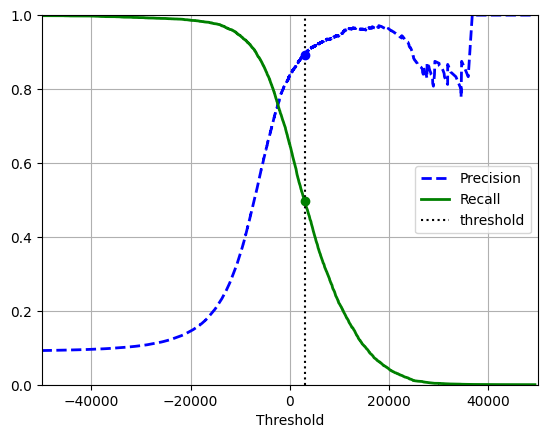

In [121]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

**To the student**: 
* How does percision and recall change with increasing or decreasing the threshold? 

        * With the increase in threshold, precision increases whereas recall score decreases.
        * With the decrease in threshold, recall increases whereas precision drops.

* What is the intuition behind this behavior?

        The intuition behind this behavior lies in the trade-off between precision and recall. By adjusting the threshold, we can control the classifier's tendency to make positive predictions. Increasing the threshold makes the classifier more cautious, reducing false positives but potentially missing some true positives, resulting in higher precision but lower recall. Decreasing the threshold increases the classifier's inclusiveness, capturing more positive instances but also increasing the chances of false positives, leading to higher recall but lower precision.


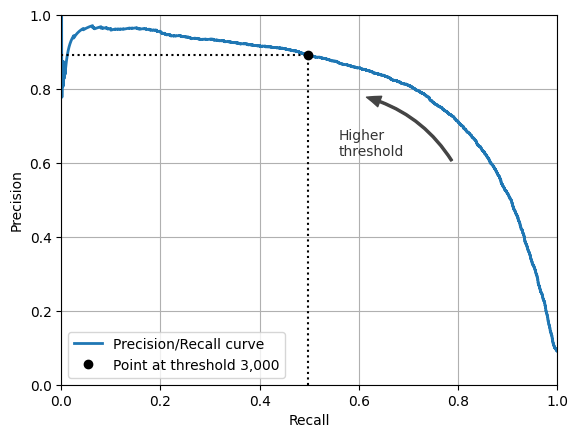

In [57]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [59]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [60]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [61]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [62]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## The ROC Curve

In [65]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

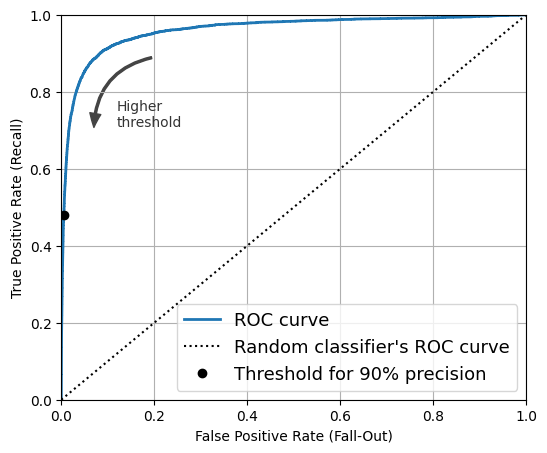

In [67]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Warning:** the following cell may take a few minutes to run.

In [69]:
forest_clf = RandomForestClassifier(random_state=42)

In [70]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [71]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [72]:
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [73]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

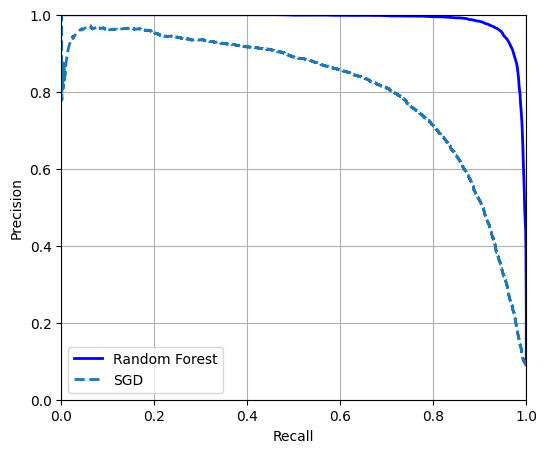

In [74]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

We could use `cross_val_predict(forest_clf, X_train, y_train_5, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [75]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [76]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [77]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [78]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402